<a href="https://colab.research.google.com/github/shalu236616/AI-and-ML-PROJECT-/blob/main/IREP_Decision_Tree_On_Intrusion_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

🔹 Workflow Steps

1️⃣ Data Loading

Libraries Used: numpy, pandas, matplotlib.pyplot

Loads the dataset from a CSV file:

df = pd.read_csv('/content/cybersecurity_intrusion_data.csv')

df.head()

Drops the "session_id" column, assuming it's not useful for analysis:

    df = df.drop(["session_id"], axis=1)

2️⃣ Data Exploration & Cleaning

Descriptive Statistics: df.describe()
Data Information: df.info(), df.columns
Missing Values Check: df.isna().sum()
Handling Missing Values: Fills missing values in the "encryption_used" column using its mode:
 df['encryption_used'] = df['encryption_used'].apply(
     lambda x: df['encryption_used'].mode()[0] if pd.isna(x) else x
 )

3️⃣ Data Encoding

Encodes categorical variables using LabelEncoder:

    from sklearn.preprocessing import LabelEncoder

    label_encoder = LabelEncoder()
    data_transformed = df.copy()
    columnsNeedEncoding = []

    for col in df.columns:
        if df[col].dtype == 'object':
            print(f"Unique values of '{col}' is {df[col].unique()}")
            columnsNeedEncoding.append(col)

    for col in columnsNeedEncoding:
        data_transformed[col] = label_encoder.fit_transform(df[col])

4️⃣ Data Scaling

Standardizes numerical features using StandardScaler:

    from sklearn.preprocessing import StandardScaler

    encode_to_columns = ['network_packet_size', 'login_attempts', 'session_duration',
                        'ip_reputation_score', 'failed_logins']

    scaler = StandardScaler()
    data_transformed[encode_to_columns] = scaler.fit_transform(data_transformed[encode_to_column])

🔹 Key Machine Learning Steps

1️⃣ Train-Test Split

Splits the dataset into 80% training and 20% testing:

    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

2️⃣ Train an Initial Decision Tree

Trains a Decision Tree Classifier with max_depth=13 and Gini impurity:

    from sklearn.tree import DecisionTreeClassifier

    model1 = DecisionTreeClassifier(max_depth=6, criterion='gini')
    model1.fit(X_train, y_train)
Makes Predictions & Computes Accuracy:

    y_pred = model1.predict(X_test)
    from sklearn.metrics import accuracy_score
    acc = accuracy_score(y_test, y_pred)




In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import _tree
import seaborn as sns


df = pd.read_csv("/content/cybersecurity_intrusion_data.csv")
print(df.head())

  session_id  network_packet_size protocol_type  login_attempts  \
0  SID_00001                  599           TCP               4   
1  SID_00002                  472           TCP               3   
2  SID_00003                  629           TCP               3   
3  SID_00004                  804           UDP               4   
4  SID_00005                  453           TCP               5   

   session_duration encryption_used  ip_reputation_score  failed_logins  \
0        492.983263             DES             0.606818              1   
1       1557.996461             DES             0.301569              0   
2         75.044262             DES             0.739164              2   
3        601.248835             DES             0.123267              0   
4        532.540888             AES             0.054874              1   

  browser_type  unusual_time_access  attack_detected  
0         Edge                    0                1  
1      Firefox                    0 

In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9537 entries, 0 to 9536
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   session_id           9537 non-null   object 
 1   network_packet_size  9537 non-null   int64  
 2   protocol_type        9537 non-null   object 
 3   login_attempts       9537 non-null   int64  
 4   session_duration     9537 non-null   float64
 5   encryption_used      7571 non-null   object 
 6   ip_reputation_score  9537 non-null   float64
 7   failed_logins        9537 non-null   int64  
 8   browser_type         9537 non-null   object 
 9   unusual_time_access  9537 non-null   int64  
 10  attack_detected      9537 non-null   int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 819.7+ KB


In [57]:
df_cleaned = df.drop(columns=['session_id'])
df.drop(columns=['session_id'], inplace=True)



In [58]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data_transformed=df.copy()
columnsNeedEncoding=[]
for i in df.columns:
  if df[i].dtype=='object':
    print(f"Unique values of '{i}' is {df[i].unique()}")
    columnsNeedEncoding.append(i)

Unique values of 'protocol_type' is ['TCP' 'UDP' 'ICMP']
Unique values of 'encryption_used' is ['DES' 'AES' nan]
Unique values of 'browser_type' is ['Edge' 'Firefox' 'Chrome' 'Unknown' 'Safari']


In [59]:
for i in columnsNeedEncoding:
  data_transformed[i]=label_encoder.fit_transform(df[i])

In [60]:
from sklearn.preprocessing import StandardScaler
encode_to_columns = ['network_packet_size','login_attempts','session_duration',
                     'ip_reputation_score','failed_logins']
scaler = StandardScaler()
data_transformed[encode_to_columns] = scaler.fit_transform(df[encode_to_columns])

In [61]:
data_transformed.head(8)

,network_packet_size,protocol_type,login_attempts,session_duration,encryption_used,ip_reputation_score,failed_logins,browser_type,unusual_time_access,attack_detected
0,0.496899,1,-0.016346,-0.381125,1,1.554930,-0.500779,1,0,1
1,-0.143322,1,-0.525794,0.972960,1,-0.168029,-1.467959,2,0,0
2,0.648132,1,-0.525794,-0.912503,1,2.301950,0.466400,0,0,1
3,1.530327,2,-0.016346,-0.243473,1,-1.174443,-1.467959,4,0,1
4,-0.239103,1,0.493102,-0.330830,0,-1.560484,-0.500779,2,0,0
5,-0.239103,2,0.493102,-0.524175,0,0.514478,0.466400,0,1,0
6,1.585779,0,-0.016346,-0.082183,0,0.465293,-0.500779,0,0,1
7,0.769119,1,-0.525794,-0.991897,1,-1.318646,1.433580,0,1,1


In [62]:
X = data_transformed.drop(["attack_detected"], axis=1)
y = data_transformed["attack_detected"]

In [63]:
X.head()

,network_packet_size,protocol_type,login_attempts,session_duration,encryption_used,ip_reputation_score,failed_logins,browser_type,unusual_time_access
0,0.496899,1,-0.016346,-0.381125,1,1.554930,-0.500779,1,0
1,-0.143322,1,-0.525794,0.972960,1,-0.168029,-1.467959,2,0
2,0.648132,1,-0.525794,-0.912503,1,2.301950,0.466400,0,0
3,1.530327,2,-0.016346,-0.243473,1,-1.174443,-1.467959,4,0
4,-0.239103,1,0.493102,-0.330830,0,-1.560484,-0.500779,2,0


In [64]:
y

,attack_detected
0,1
1,0
2,1
3,1
4,0
...,...
9532,1
9533,0
9534,0
9535,0


In [65]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, _tree,plot_tree, export_text
from sklearn.metrics import accuracy_score

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [67]:
model1=DecisionTreeClassifier(criterion='gini',max_depth=6)
model1.fit(X_train, y_train)
y_pred = model1.predict(X_test)

In [68]:
acc = accuracy_score(y_test, y_pred)
acc

0.8967505241090147

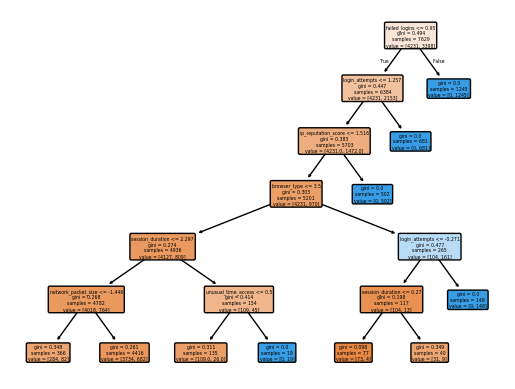

In [69]:
plot_tree(model1, filled=True, rounded=True, feature_names=X.columns)
plt.show()

**Decision trees with different hyperparameters**

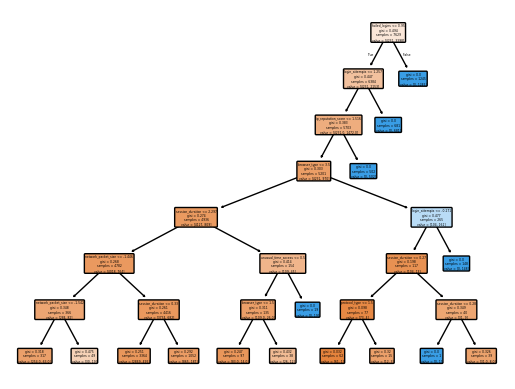

In [70]:
# now we have to apply different parameter to get 5 different varient of our decision tree
model = DecisionTreeClassifier(criterion='gini', max_depth=7,min_samples_leaf=1).fit(X_train, y_train)
plot_tree(model, filled=True, rounded=True, feature_names=X.columns)
plt.show()




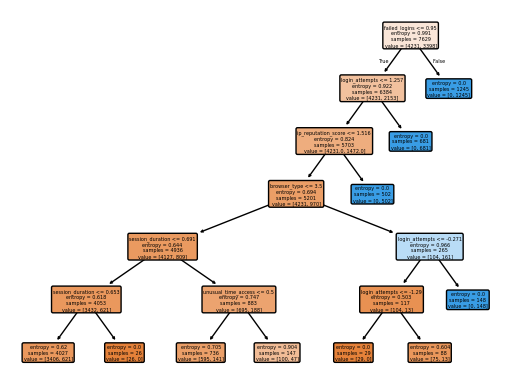

In [71]:
model = DecisionTreeClassifier(criterion='entropy', max_depth=6,min_samples_split=2).fit(X_train, y_train)
plot_tree(model, filled=True, rounded=True, feature_names=X.columns)
plt.show()

**IREP**
1. Extracting Rules from Decision Tree(get_rules)
2. Prunes rules with high error rates (>50%)
3. Applying Rule-Based Classifier to get the accuracy

In [72]:
def extract_rules(tree, features):
    tree_ = tree.tree_
    feature_name = [features[i] if i != _tree.TREE_UNDEFINED else "undefined!" for i in tree_.feature]
    paths = []
    path = []
    def recurse(node, path, paths):
        if tree_.feature[node] != _tree.TREE_UNDEFINED:
            name = feature_name[node]
            threshold = tree_.threshold[node]
            left_path = path + [(name, "<=", threshold)]
            right_path = path + [(name, ">", threshold)]
            recurse(tree_.children_left[node], left_path, paths)
            recurse(tree_.children_right[node], right_path, paths)
        else:
            paths.append((path, tree_.value[node]))
    recurse(0, path, paths)
    return paths

In [73]:
def extract_rules(tree, features):
    tree_ = tree.tree_
    feature_name = [features[i] if i != _tree.TREE_UNDEFINED else "undefined!" for i in tree_.feature]
    paths = []
    path = []
    def recurse(node, path, paths):
        if tree_.feature[node] != _tree.TREE_UNDEFINED:
            name = feature_name[node]
            threshold = tree_.threshold[node]
            left_path = path + [(name, "<=", threshold)]
            right_path = path + [(name, ">", threshold)]
            recurse(tree_.children_left[node], left_path, paths)
            recurse(tree_.children_right[node], right_path, paths)
        else:
            paths.append((path, tree_.value[node]))
    recurse(0, path, paths)
    return paths


In [74]:
# Function to prune rules
def prune_rules(rules):
    pruned_rules = []
    for path, value in rules:
        pos = value[0][1]  # Positive examples
        neg = value[0][0]  # Negative examples
        if neg / (pos + neg) > 0.5:  # Prune if error rate > 50%
            pruned_rules.append((path, value))
    return pruned_rules# Extract rules
rules = extract_rules(model1, X.columns)

pruned_rules = prune_rules(rules)

def classify_with_rules(sample, rules):
    for rule, value in rules:
        match = all(sample[cond[0]] <= cond[2] if cond[1] == "<=" else sample[cond[0]] > cond[2] for cond in rule)
        if match:
            return np.argmax(value)  # Assign class with max value
    return np.argmax(np.bincount(y_train))  # Default to majority class

# Apply rule-based classification on test data
y_pred_rules = np.array([classify_with_rules(X_test.iloc[i], pruned_rules) for i in range(len(X_test))])
pruned_rule_accuracy = accuracy_score(y_test, y_pred_rules)

In [52]:
print(f"Pruned Rule - Accuracy: {pruned_rule_accuracy:.4f}")

Pruned Rule - Accuracy: 0.5529


Implementation explained according to the research paper(in terms of growing set and pruning set)

In [76]:
from sklearn.metrics import accuracy_score
def growRule(X_train, y_train):
    # Grows a decision tree rule using training data
    model = DecisionTreeClassifier(max_depth=10)
    model.fit(X_train, y_train)
    return model

def pruneRule(model, X_prune, y_prune):
    # Prunes the rule if pruning improves accuracy
    initAccuracy = model.score(X_prune, y_prune)

    # Try removing splits (simplify rule)
    for feature in range(X_prune.shape[1]):
        tempX = X_prune.copy()
        tempX.iloc[:, feature] = 0

        tempModel = DecisionTreeClassifier(max_depth=15)
        tempModel.fit(tempX, y_prune)

        if tempModel.score(tempX, y_prune) > initAccuracy:
            model = tempModel  # Keep pruned rule
            initAccuracy = tempModel.score(tempX, y_prune)

    return model

def irep(X, y, test_size=0.2):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, stratify=y)

    ruleset = []
    pos_neg = pd.concat([X_train, y_train], axis=1)

    while not pos_neg[y_train.name].empty and pos_neg[y_train.name].sum() > 0:
        grow_pos_neg = pos_neg.sample(frac=0.7)  # Randomly split for growing phase
        prune_pos_neg = pos_neg.drop(grow_pos_neg.index)  # Remaining for pruning

        # Train rule on growing set
        rule = growRule(grow_pos_neg.iloc[:, :-1], grow_pos_neg.iloc[:, -1])
        # Prune on pruning set
        rule = pruneRule(rule, prune_pos_neg.iloc[:, :-1], prune_pos_neg.iloc[:, -1])

        # Calculate error on pruning set
        error_rate = 1 - rule.score(prune_pos_neg.iloc[:, :-1], prune_pos_neg.iloc[:, -1])

        # If error exceeds threshold i.e 50%, stop
        if error_rate > 0.5:
            break

        ruleset.append(rule)

        # Remove covered examples
        covered = rule.predict(pos_neg.iloc[:, :-1]) == pos_neg.iloc[:, -1]
        pos_neg = pos_neg[~covered]

    return ruleset, X_test, y_test

# Predicts labels using the extracted ruleset
def predict_with_ruleset(ruleset, X_test):
    predictions = np.zeros(X_test.shape[0])

    for rule in ruleset:
        rule_predictions = rule.predict(X_test)
        predictions = np.logical_or(predictions, rule_predictions).astype(int)

    return predictions

rules, X_test, y_test = irep(X, y)

# Use extracted rules to make predictions
y_pred = predict_with_ruleset(rules, X_test)

# Compute accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"IREP Accuracy: {accuracy * 100:.2f}%")
print(f"Extracted {len(rules)} rules from the dataset.")


IREP Accuracy: 44.71%
Extracted 6 rules from the dataset.
